In [1]:
import os
from keras.utils import load_img
from sklearn.model_selection import train_test_split
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import preprocess_input
import glob

In [2]:
input_path= []
labels= []

for class_name in os.listdir('cat_dog'):
    for path in os.listdir('cat_dog/'+class_name):
        if class_name== 'cats':
            labels.append(0)
        else:
            labels.append(1)
        input_path.append(os.path.join('cat_dog', class_name, path))
print(input_path[98], labels[98])

cat_dog\cats\cats_original_cats_original_cat_358.jpg_810f40d7-58ef-41bd-acb4-a28a0240cf1c.jpg_c60ccb94-bf97-471f-8fc1-4b12e21a3f8d.jpg 0


In [3]:
print(len(input_path))
print(len(labels))

2094
2094


In [4]:
df= pd.DataFrame()
df['Input']= input_path
df['Labels']= labels
df= df.sample(frac= 1).reset_index(drop= True)
df.head()

,Input,Labels
0,cat_dog\dogs\dogs_original_dogs_original_dog_2...,1
1,cat_dog\cats\cat_385.jpg,0
2,cat_dog\cats\cat_580.jpg,0
3,cat_dog\dogs\dogs_original_dog_419.jpg_d0ab5da...,1
4,cat_dog\cats\cats_original_cats_original_cat_4...,0


In [5]:
df.tail()

,Input,Labels
2089,cat_dog\cats\cat_577.jpg,0
2090,cat_dog\cats\cats_original_cat_388.jpg_1b75a82...,0
2091,cat_dog\dogs\dogs_original_dog_475.jpg_0a88e5c...,1
2092,cat_dog\cats\cats_original_cat_49.jpg_dd71d603...,0
2093,cat_dog\dogs\dogs_original_dog_473.jpg_dd54c97...,1


In [6]:
images= []
for i in df['Input']:
    img= load_img(i, target_size= (150,150))
    img= np.array(img)
    images.append(img)

In [7]:
data= np.array(images)
labels= np.array(df['Labels'])

In [8]:
print(data.shape)
print(labels.shape)

(2094, 150, 150, 3)
(2094,)


In [10]:
classes= ['Cat', 'Dog']

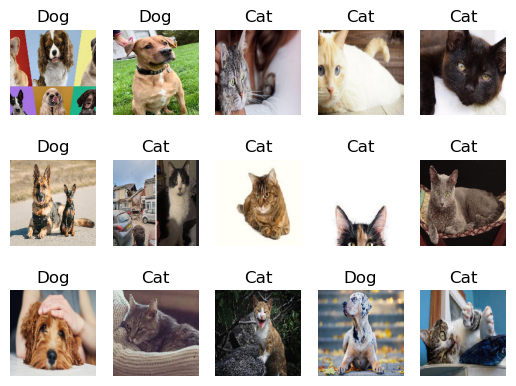

In [14]:
plt.subplots(3,5)
for i in range(15):
    num= np.random.randint(0, 2094)
    plt.subplot(3,5,i+1)
    plt.imshow(data[num])
    plt.title(classes[labels[num]])
    plt.axis('off')

In [64]:
model= Sequential([
    Conv2D(50, (3,3), activation= 'relu'),
    MaxPool2D(pool_size= (2,2)),
    #Dropout(0.5),
    
    Conv2D(50, (3,3), activation= 'relu'),
    #MaxPool2D(pool_size= (2,2)),
    
    #Conv2D(10, (3,3), activation= 'relu'),
    #MaxPool2D(pool_size= (2,2)),
    
    Flatten(),
    #Dense(10, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

In [65]:
model.compile(optimizer= SGD(learning_rate= 0.0001), loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit(data, labels, epochs= 30, validation_split= 0.2, batch_size= 30)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 717ms/step - accuracy: 0.4772 - loss: 473.8611 - val_accuracy: 0.5155 - val_loss: 0.8224
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 717ms/step - accuracy: 0.5569 - loss: 0.7323 - val_accuracy: 0.5370 - val_loss: 0.7364
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 757ms/step - accuracy: 0.6016 - loss: 0.6978 - val_accuracy: 0.5537 - val_loss: 0.7103
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 78s 682ms/step - accuracy: 0.6554 - loss: 0.6333 - val_accuracy: 0.5871 - val_loss: 0.6835
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 683ms/step - accuracy: 0.6907 - loss: 0.6050 - val_accuracy: 0.5919 - val_loss: 0.6813
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 697ms/step - accuracy: 0.7064 - loss: 0.5779 - val_accuracy: 0.5990 - val_loss: 0.6682
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 635ms/step - accuracy: 0.7449 - loss: 0.5357 - val_accuracy: 0.6181 - val_loss: 0.6551
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 639ms/step - accuracy: 0.7601 - loss: 0.5150 - val_ac